In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#from bqplot import pyplot as plt
#from bqplot import *

In [2]:
sns.set()

### Load data
The usual.

In [3]:
df = pd.read_csv('data/cycles-with-features.csv', header=0).drop(labels='Unnamed: 0', axis=1)
df = df[df.Cycle >= 1].reset_index().drop('index', axis=1)

# Curve fitting
Now on piecewise components of each cycle.

### Polynomial curve fit
Curve fit on increasing slope.

In [4]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Select increasing-load side of each cycle.

In [5]:
c=35
start = df[(df.Cycle==c) & (df.Min==1)].index.values[0]
peak = df[(df.Cycle==c) & (df.Max==1)].index.values[0]+1
inc = df[df.Cycle==c].iloc[:(peak-start)]

In [6]:
X = inc.drop(['Load', 'Datetime'], axis=1).fillna(0)
y = inc.Load
model = make_pipeline(PolynomialFeatures(5), Ridge())
model.fit(X, y)
yh = model.predict(X)

/home/nwchen/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


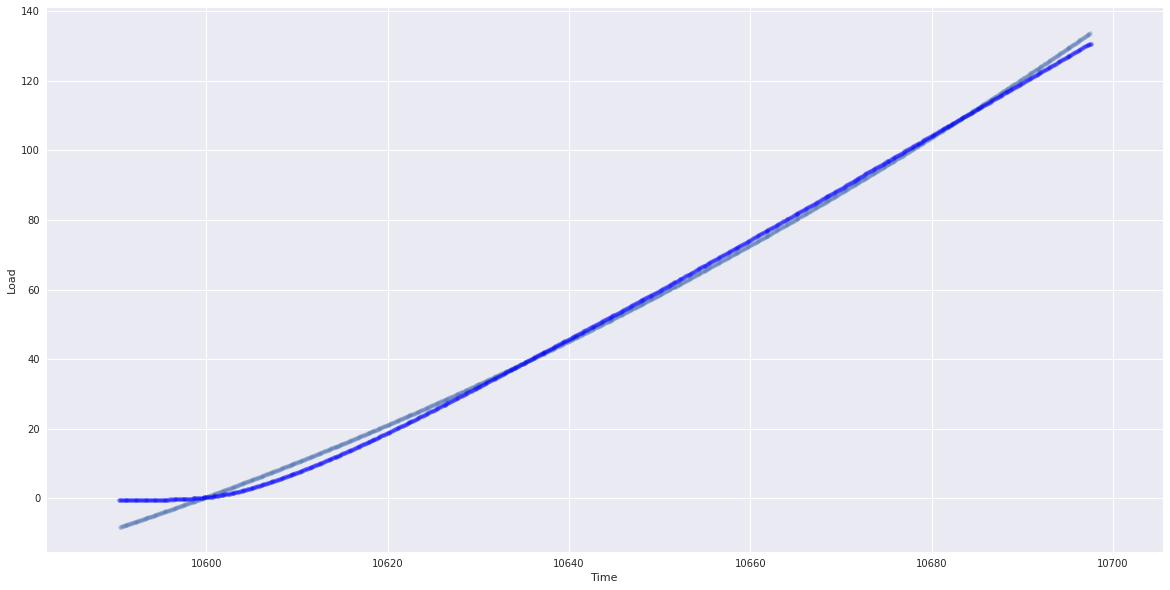

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.regplot(X.Time, yh, fit_reg=False, ax=ax, scatter_kws={'s': 20, 'alpha': 0.3})
sns.regplot(X.Time, y, fit_reg=False, ax=ax, scatter_kws={'color': 'blue', 's': 20, 'alpha': 0.3})

In [8]:
np.sqrt(mse(yh, y))

1.9939319237975657